<a href="https://colab.research.google.com/github/siddharth-2002/Hackerstreet-Prediction-of-Heart-Disease-Using-Ml-Algorithim-/blob/main/Twitter_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

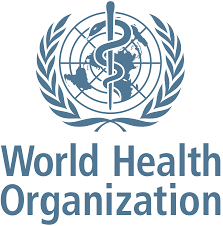
          WORLD HEALTH ORGANIZATION
 The World Health Organization is a specialized agency of the United Nations responsible for international public health. The WHO Constitution states its main objective as "the attainment by all peoples of the highest possible level of health



Sources: https://cutt.ly/WldZvcR, https://developer.twitter.com/en, fivethirtyeight.ipynb (Also Available), https://cutt.ly/6ldZMmO, https://cutt.ly/sldZ6S3, https://cutt.ly/1ldXebF

                          **SENTIMENTAL ANALYSIS OF 'WHO' DATA**



In [ ]:
# Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [ ]:
#!pip install TextBlob

In [ ]:
#pip install tweepy

In [ ]:
#pip install wordcloud

In [ ]:
#pip install pandas

In [ ]:
#pip  install matplotlib

In [ ]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#fivethirtyeight is best suited for this analysis

In [ ]:
# Twitter Api Credentials
# Please note, I have replaced these keys and they will not work for your purposes.
consumerKey = "ZOPFy72UHx7RQKh1Ty63GtMhc"
consumerSecret = "4BBLh5XUNvPz64ZxUORxUS5sJcvEORiJ0uY7lJBlSESTIthsWE"
accessToken = "1431984906633048064-evmkWs7g407oB2XZL1JKkXMORmErtt"
accessTokenSecret = "rHhbHXERDZZvJzmL9W1v6qwn4LajZCeqbRXXq7HFOr2Mh"

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
screen_name = ""

# fetching the user
user = api.get_user(screen_name)

# fetching the followers_count
followers_count = user.followers_count

print("The number of followers of the user are : " + str(followers_count))

The number of followers of the user are : 428


In [ ]:
# Extract 25 tweets from the twitter user
posts = api.user_timeline(screen_name='sarthak', count = 25, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

TweepError: ignored

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,RT @AP: Al Jazeera has accused Israel of “deli...
1,I’m wearing @PacoRabanne you fucking peasant h...
2,"RT @bustle: On TikTok, the woman briefly known..."
3,I’d love nothing more than to have those three...
4,@NylonMag @bustle 🤍


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink

 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,😄
1,"_58: Ngl Mia finer now that she’s happy, good ..."
2,📍🇮🇹 🤍
3,: TE AMO 🤍
4,Cartier buss downs ʲᵘˢᵗ not my thing
5,Literally one of the most beautiful women I’ve...
6,"COSTA RICA, TE AMO! 🇨🇷🧡"
7,420 TE AMOOOOO
8,Literally can’t make this up. I can’t stop l...
9,The saddest part is I did a makeup tutorial fo...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,😄,0.000000,0.000000
1,"_58: Ngl Mia finer now that she’s happy, good ...",0.800000,0.837500
2,📍🇮🇹 🤍,0.000000,0.000000
3,: TE AMO 🤍,0.000000,0.000000
4,Cartier buss downs ʲᵘˢᵗ not my thing,0.000000,0.000000
5,Literally one of the most beautiful women I’ve...,0.750000,0.675000
6,"COSTA RICA, TE AMO! 🇨🇷🧡",0.000000,0.000000
7,420 TE AMOOOOO,0.000000,0.000000
8,Literally can’t make this up. I can’t stop l...,0.000000,0.000000
9,The saddest part is I did a makeup tutorial fo...,0.000000,0.000000


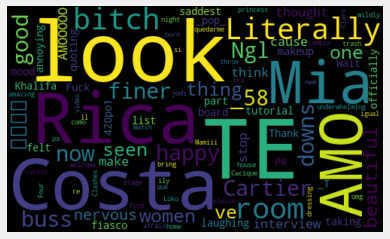

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Topic modeling is used to understand the signal in text using methods like [LDA](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24).

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Something magical is happening on 🧞\nCheck it...,1.000000,0.500000,Positive
1,😍 \n.\n.\n.\n📷,0.000000,0.000000,Neutral
2,Did I say it correctly? KareenaKapoorKhan 😂.\...,0.000000,0.000000,Neutral
3,"Ad\nThis IPL, enjoy prediction on sports at w...",0.333333,0.433333,Positive
4,Ventriloquist audition?!!😂 \n.\n.\n.\nSunnyLeone,0.000000,0.000000,Neutral
5,"Ad\nWith Zero Investment, Partner with and ea...",0.000000,0.000000,Neutral
6,Love this game!!,0.500000,-0.062500,Negative
7,Mesmerizing finishes that ranges from Mattes t...,0.566667,0.133333,Positive
8,Mood for a night swim! BeatTheHeat,0.000000,0.000000,Neutral
9,Happy Anniversary Baby ! \nHere is to living ...,0.568750,0.664062,Positive


The Tweets are now labeled as positive or negative, and it is now binary classification.

In [ ]:
# Printing positive tweets
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Something magical is happening on  🧞
Check it out here:
.
.
.
SunnyLeone nft Crypto NFTCommunity NFTcollections idreamofsunnynft indiannft NFTs opensea cryptotrading newNFTs 

2) Ad
This IPL, enjoy prediction on sports at  with weekly sports cashback up to INR 15,000 💥
Predict without worry!

Join now  (INR Users)  (Bangla Users) to predict &amp; win big!
Sunnyleone Sports Cricket Cashback 

3) Mesmerizing finishes that ranges from Mattes to Shimmers. 
This Shadow Palette allows you to create different looks from Natural, Smokey-Eye to Pop.
Get the look on 
.
SunnyLeone Cosmetics EyeLook Eyes ShadowPalette eyeshadow  

4) Happy Anniversary Baby  ! 
Here is to living our best lives and being our selves with each other. Lots of masti, love and spend forever with you! - Wifey! 

5) Ad
2nd 𝑻𝑬𝑺𝑻 Battle is on our hands 🏏
Witness the battle LIVE &amp; Predict the winning team with the best odds at 
Join  (INR Users)  (Bangla Users) to predict &amp; win big!

Sunn

In [ ]:
# Printing negative tweets
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Love this game!! 

2) And again epic fail for me!! 😂 
.
.
SunnyLeone VishnuManchu 

3) Epic fails!! 😂 



* Polarity - (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).

* Subjectivity - (how subjective or opinionated something is, 0 being completely factual, and 1 being completely opinionated.

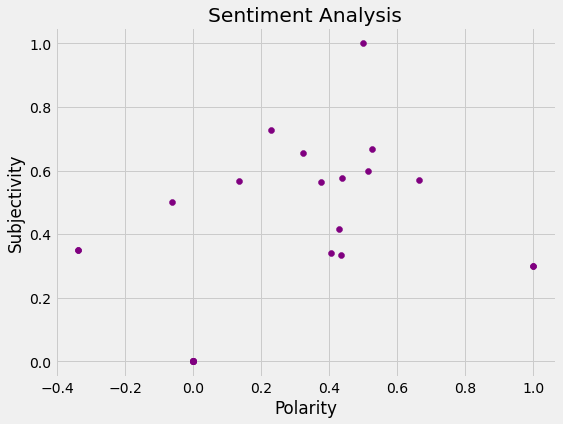

In [ ]:
# Plotting
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='purple')
# plt.scatter(x,y,color)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
df.corr()

,Subjectivity,Polarity
Subjectivity,1.000000,0.428596
Polarity,0.428596,1.000000


In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


56.0

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


12.0

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Positive    14
Neutral      8
Negative     3
Name: Analysis, dtype: int64

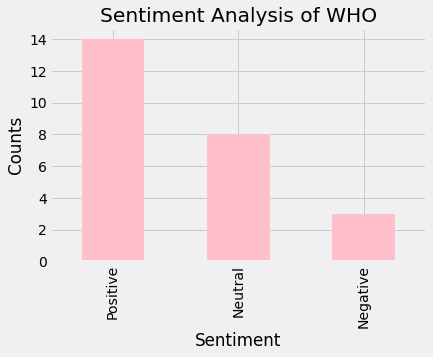

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis of WHO')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar',color='pink')
plt.show()

**CONCLUSION **






1.)Most of the Data of World Health Organization is having polarity in the range of(1,0) and the subjectivity of the organization is also in the range of (0.5 to 1) this signifies that people are emotionally attracted to the organization and loving it.

2)WHO twitter handle mostly deals with data like global commitment ,vaccine,covid-19 and medical support of the people.

3)The data composed in WHO twitter handle tells us that the data is tending towards a positive correlation.

4)Most of the tweets in the social media handle are either positive or nutral,which indicates the organization is doing a good work.